In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pandas as pd

## 1. Load Data

In [2]:
df1 = pd.read_csv('../data/raw/m0_maio/target.csv')
df2 = pd.read_csv('../data/raw/m0_junho/target.csv')
df3 = pd.read_csv('../data/raw/m0_julho/target.csv')
df4 = pd.read_csv('../data/raw/m0_agosto/target.csv')
df5 = pd.read_csv('../data/raw/m0_setembro/target.csv')

df = pd.concat([df1,df2, df3, df4,df5])

In [3]:
df['M0']= pd.to_datetime(df['M0'])
df = df[~df['M0'].isin([pd.Timestamp('20190630'), pd.Timestamp('20190731'), pd.Timestamp('20190930')])]

In [4]:
# df['M0'] = df['M0'].map(lambda x: '{0}-0{1}'.format(x.day, x.month))
df['M0'] = pd.to_datetime(df['M0']).dt.date

## 2. Publico Apto: Ativos e Bloqueados<=60dias de atraso

In [5]:
df.columns

Index(['CLIENTID', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0', 'VALOR_ATRASO_M0',
       'STATUS_CONTA_M0'],
      dtype='object')

In [6]:
df_ativos_e_bloqueados_aptos = df[(df['STATUS_CONTA_M0']=='Ativo')
                                  |((df['STATUS_CONTA_M0']=='Bloqueado')
                             &(df['VALOR_ATRASO_M0']<60))]

In [7]:
group = df_ativos_e_bloqueados_aptos.groupby(['M0','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')\

In [8]:
group.columns

Index(['M0', 'EVER60', 'COUNT'], dtype='object')

In [9]:
group.head(5)

M0  EVER60  COUNT
0  2019-05-03       0  15027
1  2019-05-03       1   2275
2  2019-05-10       0  14904
3  2019-05-10       1   2358
4  2019-05-17       0  14823

## Graph Count

In [10]:
labels = group['M0'].unique()
n_inad = group[group['EVER60']==0]['COUNT'].values
inad = group[group['EVER60']==1]['COUNT'].values

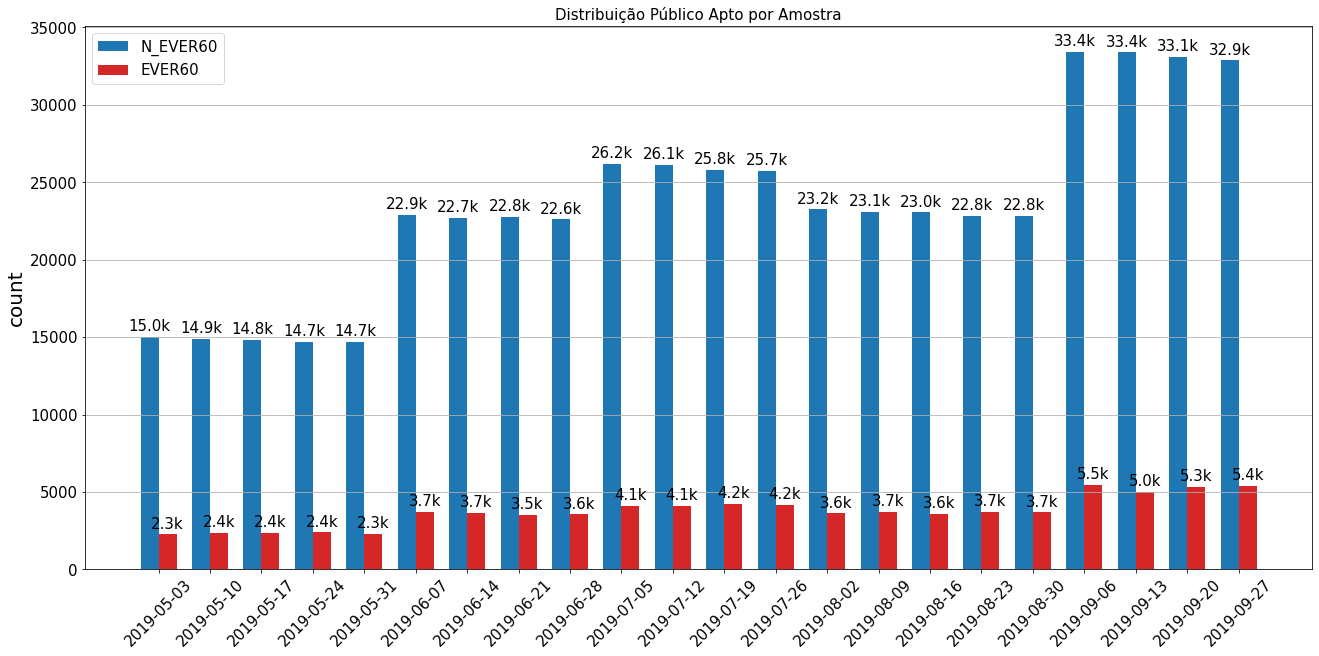

In [11]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (22,10))
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60', color='tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count', fontsize=20)
ax.set_title('Distribuição Público Apto por Amostra', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=15)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}k'.format((height/1000).round(1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=15)


autolabel(rects1)
autolabel(rects2)

ax.yaxis.grid() # horizontal lines
plt.xticks(fontsize=15, rotation = 45)
plt.yticks(fontsize=15)
plt.show()

fig.savefig('../Reports/Analise_Publico/dist_count_publico.png')

In [12]:
## Graph Percent

In [13]:
labels = group['M0'].unique()
total = group.groupby('M0')['COUNT'].sum().values

n_inad = group[group['EVER60']==0]['COUNT'].values*100/total
inad = group[group['EVER60']==1]['COUNT'].values*100/total

inad = np.around(inad, 1)
n_inad = np.around(n_inad, 1)

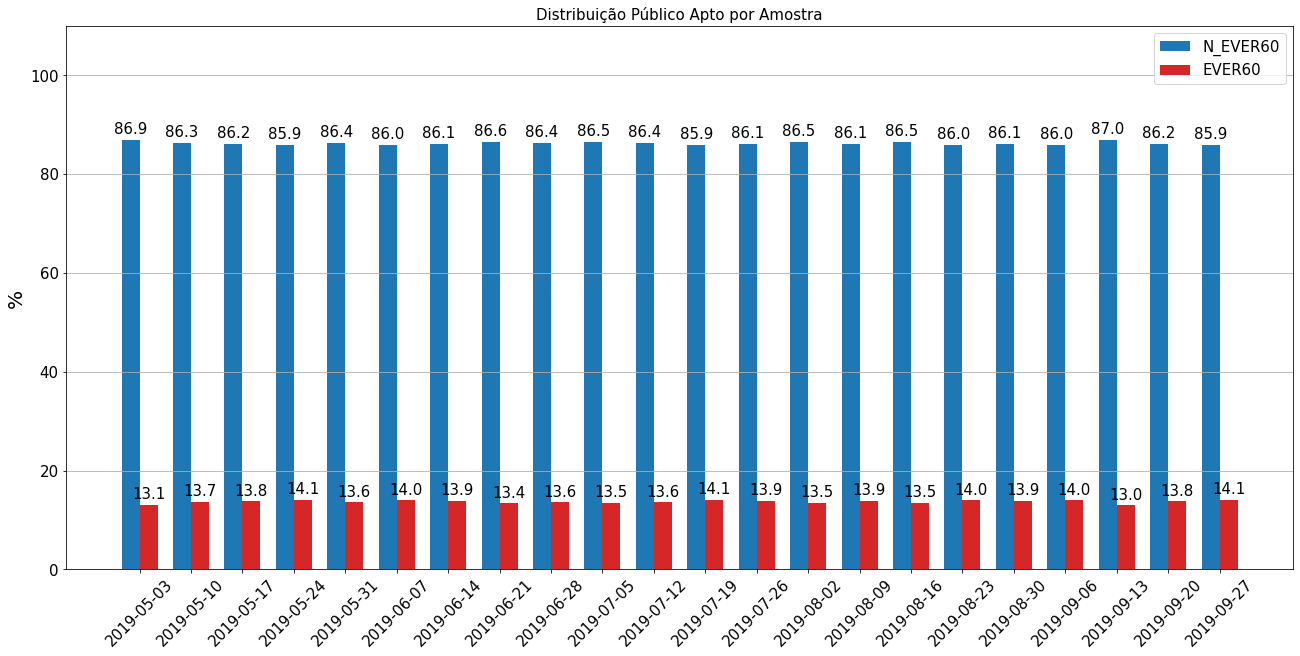

In [14]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (22,10))
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60', color='tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('Distribuição Público Apto por Amostra', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=15)
ax.set_ylim(0, 110)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=15)


autolabel(rects1)
autolabel(rects2)

ax.yaxis.grid() # horizontal lines
plt.xticks(fontsize=15, rotation = 45)
plt.yticks(fontsize=15)
plt.show()

fig.savefig('../Reports/Analise_Publico/dist_percent_publico.png')

## Save publico final

In [15]:
df_ativos_e_bloqueados_aptos[['CLIENTID', 'M0', 'DATA_CONTRATACAO_CREDITO', 'EVER60']].to_csv('../data/interim/publico_modelo_bhv.csv', index=False)